<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/CV483796.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib import pyplot as plt 
import numpy as np

## Pick or adjust a dataset

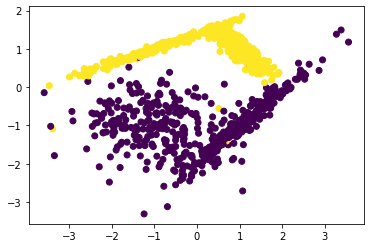

In [63]:
# X, y = make_moons(n_samples=500, noise=0.2, random_state=314)
# X, y = make_circles(n_samples=500, noise=0.2, random_state=314)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=314, shuffle=False)

plt.scatter(X[:, 0], X[:, 1], c=y);

In [56]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.arange(1.1*x_min - 0.1*x_max, -0.1*x_min + 1.1*x_max, 0.01*(x_max - x_min)),
                     np.arange(1.1*y_min - 0.1*y_max, -0.1*y_min + 1.1*y_max, 0.01*(y_max - y_min)))

In [57]:
model = AdaBoostClassifier(
    base_estimator=LogisticRegression(penalty='none'),
    n_estimators=9,
    random_state=42,
    )
model.fit(X, y);

In [58]:
sample_index = 0
print(f"Sample number {sample_index} is located at {tuple(X[sample_index, :])}, class{y[sample_index]}")
print("Predictions at each boosting iteration:")
for pred in model.staged_predict_proba(X[sample_index, :].reshape(1,-1)):
    print(pred)

Sample number 0 is located at (-1.6685316675305422, -1.2990134593088984), class0
Predictions at each boosting iteration:
[[0.97847201 0.02152799]]
[[0.83432725 0.16567275]]
[[0.73902237 0.26097763]]
[[0.68564341 0.31435659]]
[[0.65109679 0.34890321]]
[[0.62712122 0.37287878]]
[[0.60959662 0.39040338]]
[[0.5962622 0.4037378]]
[[0.58579065 0.41420935]]


## Plot individual base estimators' probability contour plots

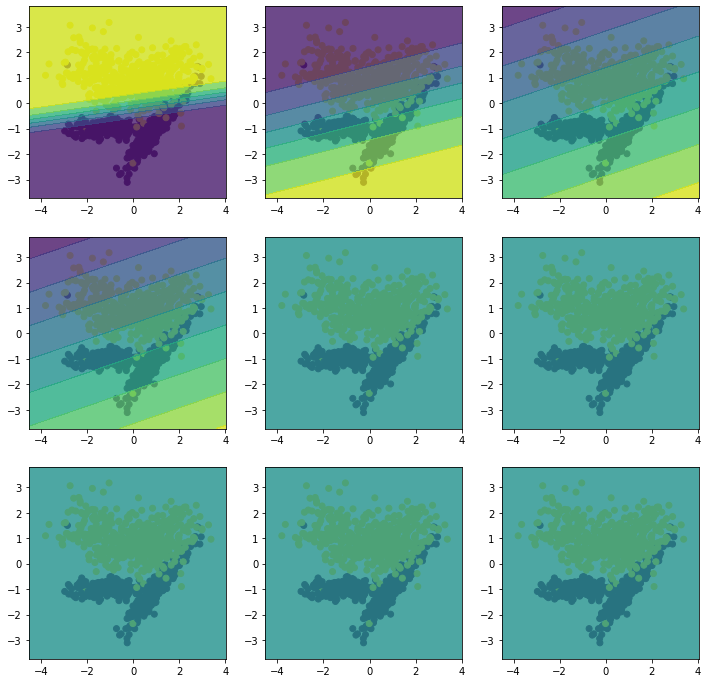

In [59]:
figure = plt.figure(figsize=(12, 12))
i = 1
for est in model:
    ax = plt.subplot(3, 3, i)
    ax.scatter(X[:, 0], X[:, 1], c=y)
    Z = est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.8)
    i += 1

## View individual base models' coefficients

In [60]:
for est in model:
    a, b = est.coef_[0]
    print(a, b, b/a)

-0.526816360849936 4.15510073079091 -7.887189995556142
0.22390882002358328 -0.9789685274718811 -4.372174920884183
0.04384012113531698 -0.14240118377629543 -3.2481932095205606
0.0014239039885991357 -0.004571018134323062 -3.210201088642302
0.0 0.0 nan
0.0 0.0 nan
0.0 0.0 nan
0.0 0.0 nan
0.0 0.0 nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


## View the staged predictions (cumulative, at each stage of boosting)

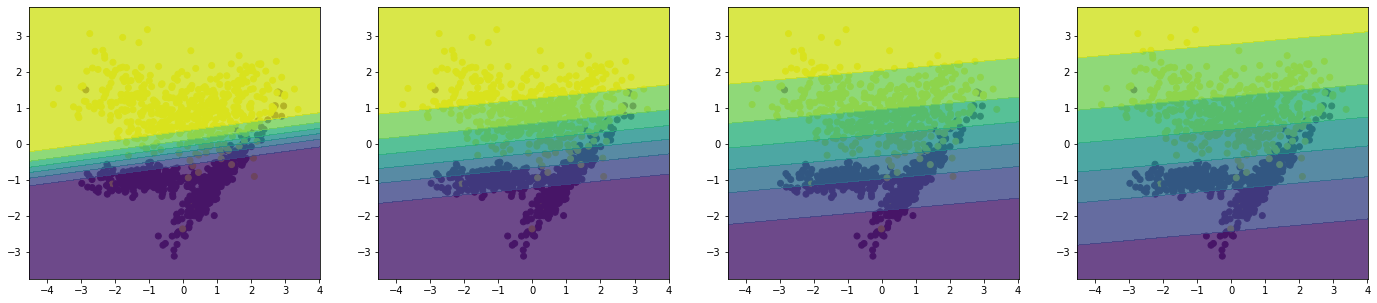

In [61]:
Zs = model.staged_predict_proba(np.c_[xx.ravel(), yy.ravel()])
i = 1
figure = plt.figure(figsize=(24, 5))
for Z in Zs:
  if i > 4:
    break
  ax = plt.subplot(1, 4, i)
  ax.scatter(X[:, 0], X[:, 1], c=y)
  Z = Z[:, 1].reshape(xx.shape)
  ax.contourf(xx, yy, Z, alpha=.8)
  i += 1

and now zoomed out, to try to see any nonlinearity in the cumulative result?

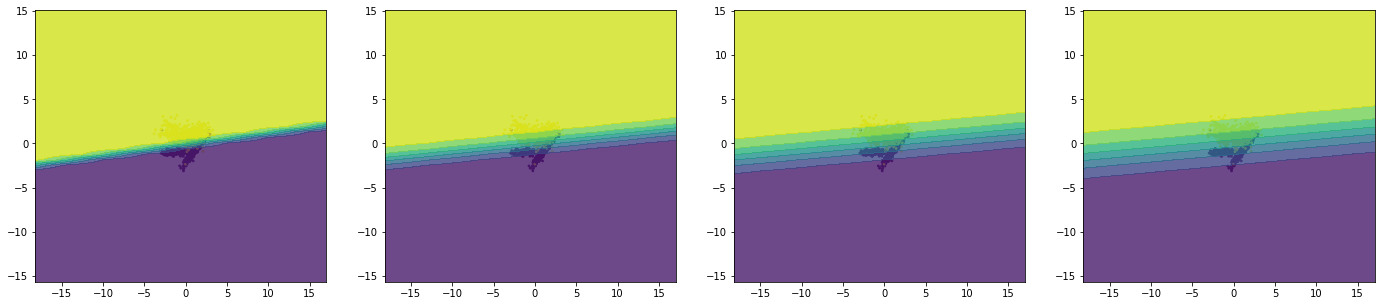

In [62]:
xx2, yy2 = np.meshgrid(
    np.arange(3*x_min - 2*x_max, -2*x_min + 3*x_max, 0.1*(x_max - x_min)),
    np.arange(3*y_min - 2*y_max, -2*y_min + 3*y_max, 0.1*(y_max - y_min)))
Zs = model.staged_predict_proba(np.c_[xx2.ravel(), yy2.ravel()])
i = 1
figure = plt.figure(figsize=(24, 5))
for Z in Zs:
    if i > 4:
        break
    ax = plt.subplot(1, 4, i)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=3)
    Z = Z[:, 1].reshape(xx2.shape)
    ax.contourf(xx2, yy2, Z, alpha=.8)
    i += 1

In [54]:
model.estimator_weights_

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])